# Blog Your Solution
This project will focus on a dataset of Apple app store apps data. The data has information on the ratings and other properties of the 7129 apps. The following questions will be explored in this project 
- Which genre of applications are most common on the app store?
- Which genre of applications are highly rated and which are least rated? 
- How does the number of languages and supported devices affect user rating? 
- How does price affect the ratings and the number of people who vote?
- Can the rating of the application be predicted from the initial properties of the application(size, supported devices, languages, price….)



In [145]:
### import the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn import svm

In [146]:
# Load in data
app_store = pd.read_csv("AppleStore.csv",delimiter=",")

In [147]:
def summarize(df, head=10):
    """The function summarizes any dataframe by describing and also showing a few header columns
    
    Args:
        df: (Dataframe): The pandas dataframe.
        head: (int): The number of head rows to display(default: 10).

    Returns:
        void
    """
    display(df.describe())
    display(df.head(head))
summarize(app_store)

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [148]:
def bar_chart(data,labels, figsize, ylabel, xlabel, title, rotation=90):
    """plot a bar chart distribution of the incoming data
    Args:
        data: (numpy array) data to plot on the y-axis
        labels: (numpy array) data to plot on the x-axis
        figsize: (tuple)figure size of the figure to plot
        ylabel: (str)the ylabel of the plot
        xlabel: (str)the xlabel of the plot
        title: (str)the title of the plot
        rotation: (int) rotation angle of x labels
    Returns:
        void:
    """
    sns.set(rc={'figure.figsize':figsize})
    plot = sns.barplot(labels,data)  
    plot.set_xticklabels(plot.get_xticklabels(), rotation=rotation) #set rotation of x-axis labels
    plot.set(ylabel=ylabel, xlabel=xlabel, title=title)
    

    
    
    
def pie_chart(data,labels, title ):
    """plot a pie chart distribution of the incoming data
    Args:
        data: (numpy array) data to plot on the y-axis
        labels: (numpy array) data to plot on the x-axis
        title: (str)the title of the plot
        colors: colors for each chart
    Returns:
        void:
    """
    # Plot
    plt.pie(data, labels=labels,
            autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.title(title)
    plt.show()

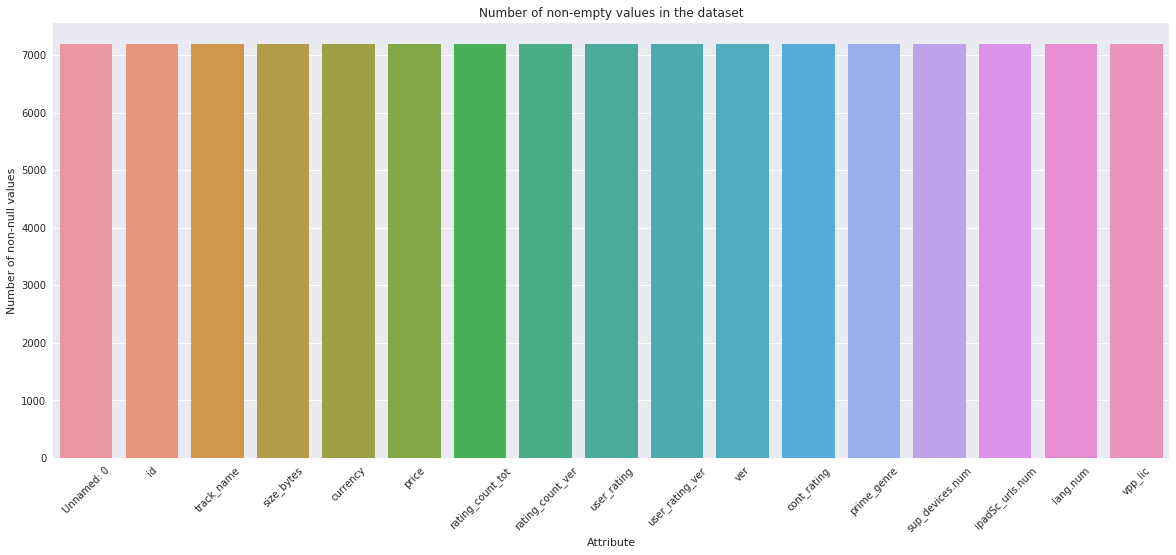

In [149]:
#Plot number of non-empty values for the dataset
missing_vals = app_store.notnull().sum()
labels = app_store.columns

bar_chart(missing_vals,labels,(20,8),"Number of non-null values", "Attribute","Number of non-empty values in the dataset",45 )

In [150]:
#analyze the binary categorical values
for column  in app_store:
    display(column)
    display(app_store[column].dtype)
    print("\n")
    

'Unnamed: 0'

dtype('int64')

'id'

dtype('int64')

'track_name'

dtype('O')

'size_bytes'

dtype('int64')

'currency'

dtype('O')

'price'

dtype('float64')

'rating_count_tot'

dtype('int64')

'rating_count_ver'

dtype('int64')

'user_rating'

dtype('float64')

'user_rating_ver'

dtype('float64')

'ver'

dtype('O')

'cont_rating'

dtype('O')

'prime_genre'

dtype('O')

'sup_devices.num'

dtype('int64')

'ipadSc_urls.num'

dtype('int64')

'lang.num'

dtype('int64')

'vpp_lic'

dtype('int64')

### Question 1: Which genre of applications are most common on the app store?

There are 23 genres of applications in the data set


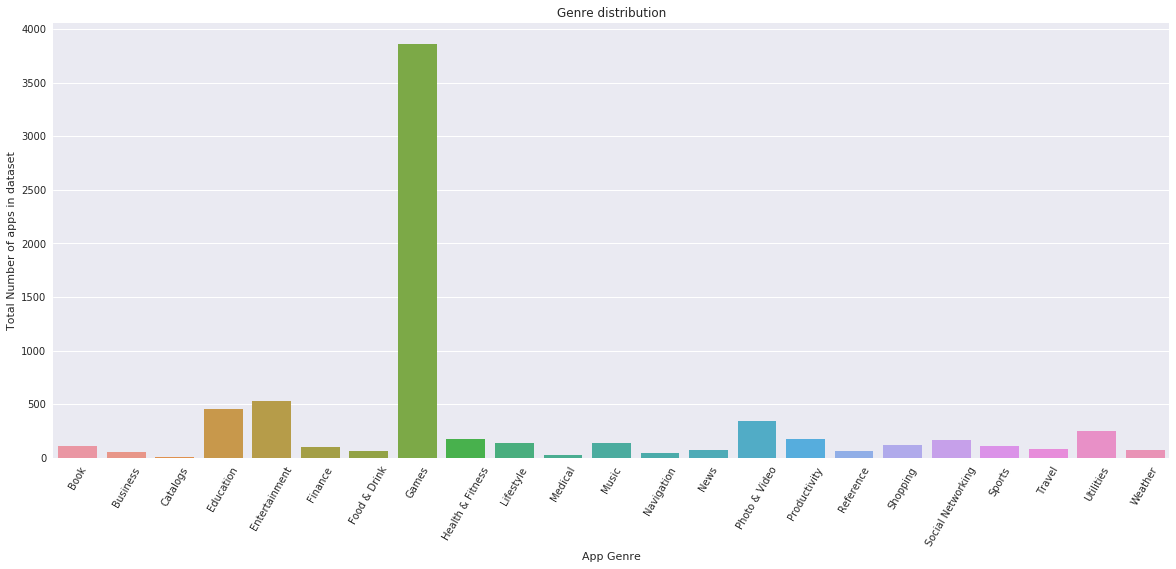

In [151]:
# we will first look at the number of genre distribution.
#genre distribution
index, count = np.unique(app_store["prime_genre"],return_counts=True)
unique = app_store["prime_genre"].nunique()
print("There are {} genres of applications in the data set".format(unique))
bar_chart(count,index,(20,8),"Total Number of apps in dataset", "App Genre","Genre distribution" ,60)


There are 23 genres of applications in the data set


0.5366124774211477

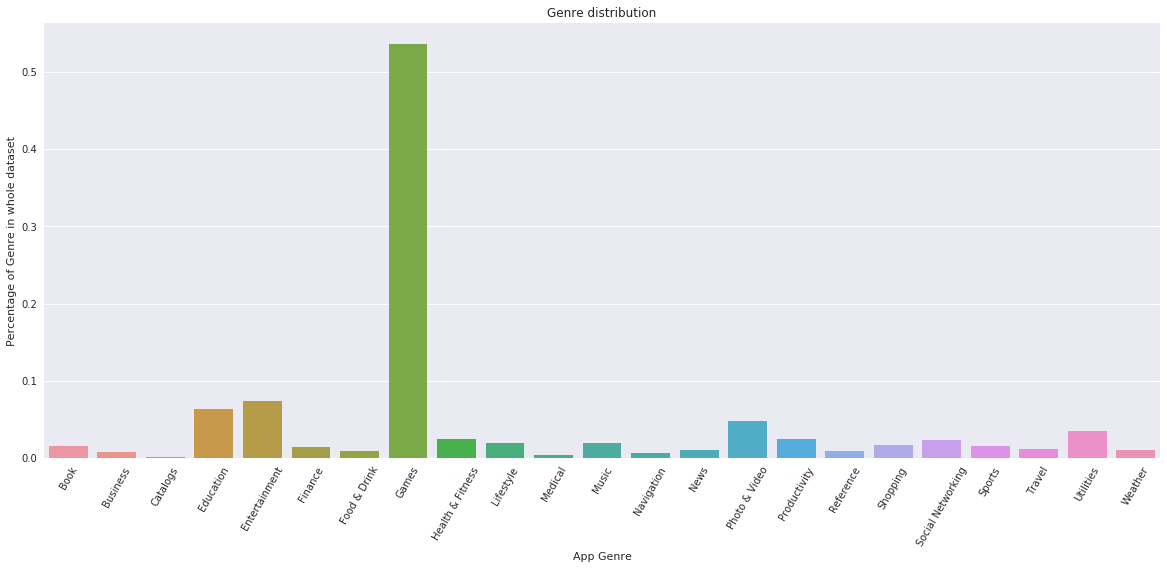

In [154]:
#we will first look at the number of genre distribution.
#genre distribution
index, count = np.unique(app_store["prime_genre"],return_counts=True)
print("There are {} genres of applications in the data set".format(unique))
count = count/count.sum()
bar_chart(count,index,(20,8),"Percentage of Genre in whole dataset", "App Genre","Genre distribution" ,60)
count[7]


There are 23 genres of applications in the data set


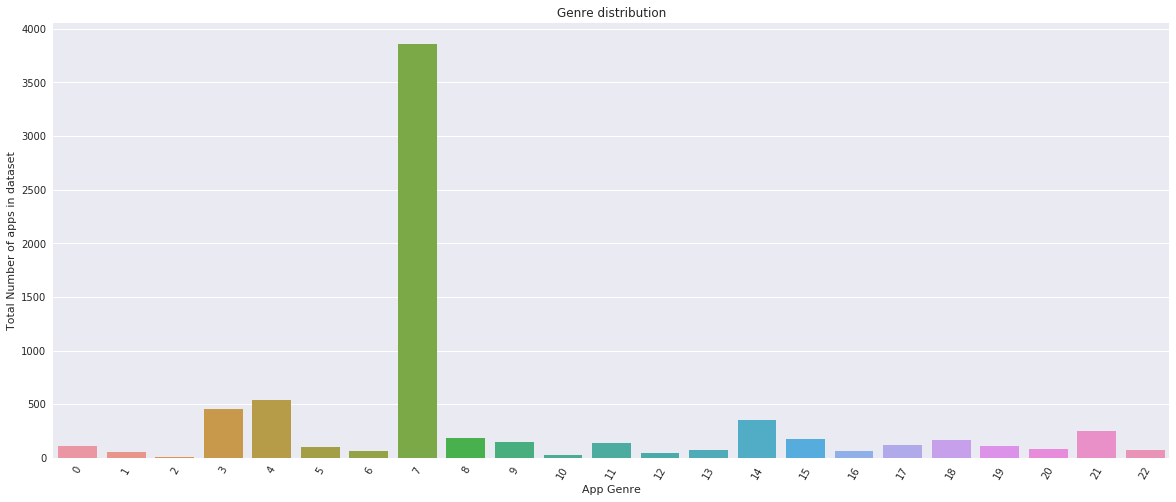

In [143]:
# we will first look at the number of genre distribution.
#genre distribution
index, count = np.unique(app_store["prime_genre"],return_counts=True)
unique = app_store["prime_genre"].nunique()
print("There are {} genres of applications in the data set".format(unique))
bar_chart(count,index,(20,8),"Total Number of apps in dataset", "App Genre","Genre distribution" ,60)



### Observation
From the bar plot, it can be seen that "Games" are the most common applications on the app store followed by "Education" and "Entertainment" applications. The least common are "Catalogs" and "Medical" applications.


### Question 2: Which genre of applications are most highly rated and most lowly rated? 

In [64]:
stats = app_store.groupby("prime_genre")['user_rating']
genres, count = np.unique(app_store["prime_genre"],return_counts=True)

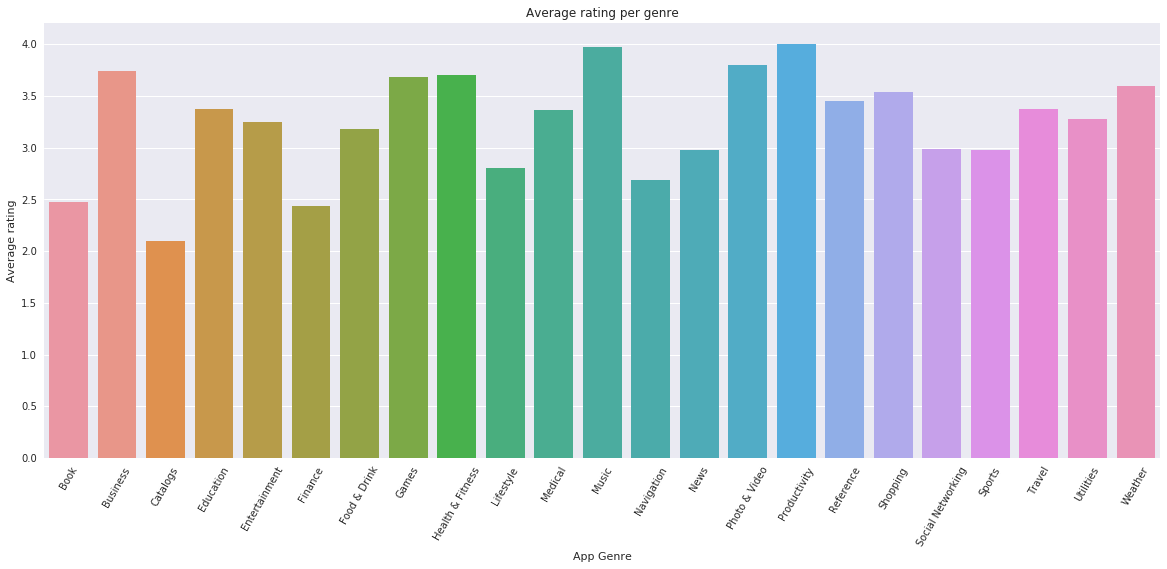

In [137]:
describe = stats.describe()
describe["genre"]=genres
bar_chart(describe["mean"],index,(20,8),"Average rating", "App Genre","Average rating per genre" ,60)


#### Observation
Productivity applications have the highest average rating followed by music and business applications. The genres with lowest average ratings include Catalogs and Finance apps.

### Question 3:  How does the number of languages and supported devices affect user rating? 

		Correlations between different attributes of the dataset		


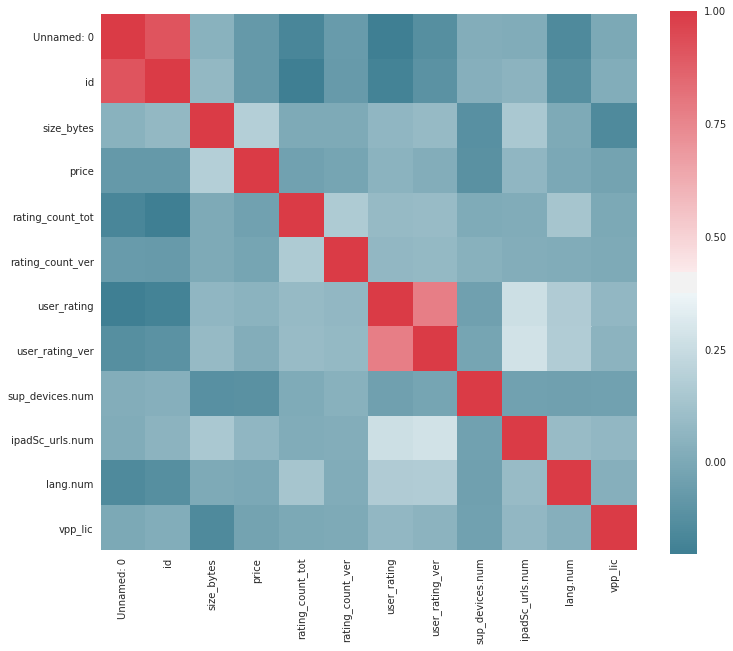

In [160]:
#Check correlations between all attributes of the dataset.
def correlations(data):
    """plot correlation between all attributes of the dataset.
    
    Args:
        data: the incoming dataframe
    Returns:
        void:
    """
    #add heatmaps to better understand correlation
    figure, axes = plt.subplots(figsize=(12, 10))
    #compute correlation
    correlations = data.corr()
    #use seaborn to plot heatmaps
    sns.heatmap(correlations, mask=np.zeros_like(correlations, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=axes)
correlations(app_store)
print("\t\tCorrelations between different attributes of the dataset\t\t")

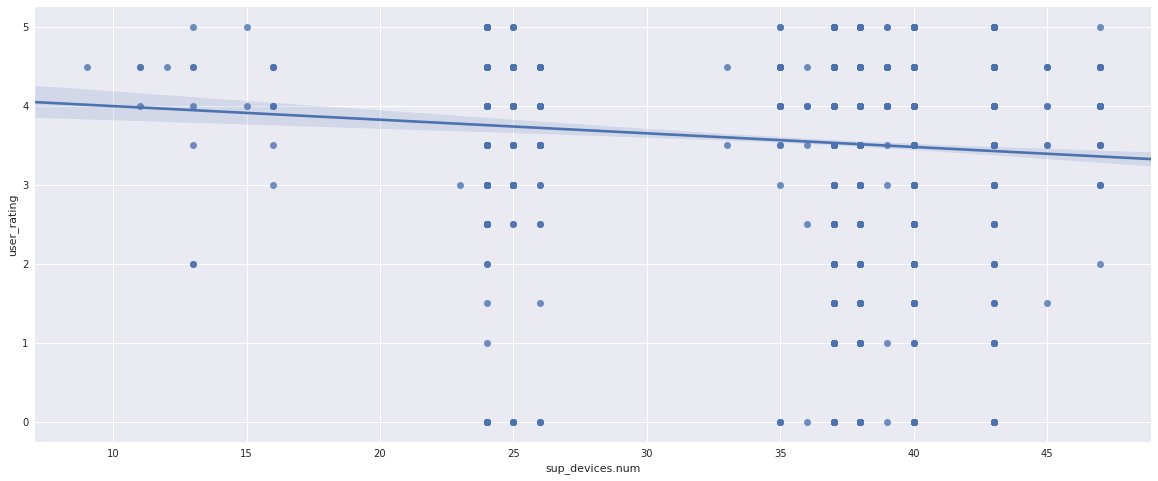

In [161]:
##plot scatter plot for rating versus supported devices
sns.regplot(app_store["sup_devices.num"], app_store["user_rating"])


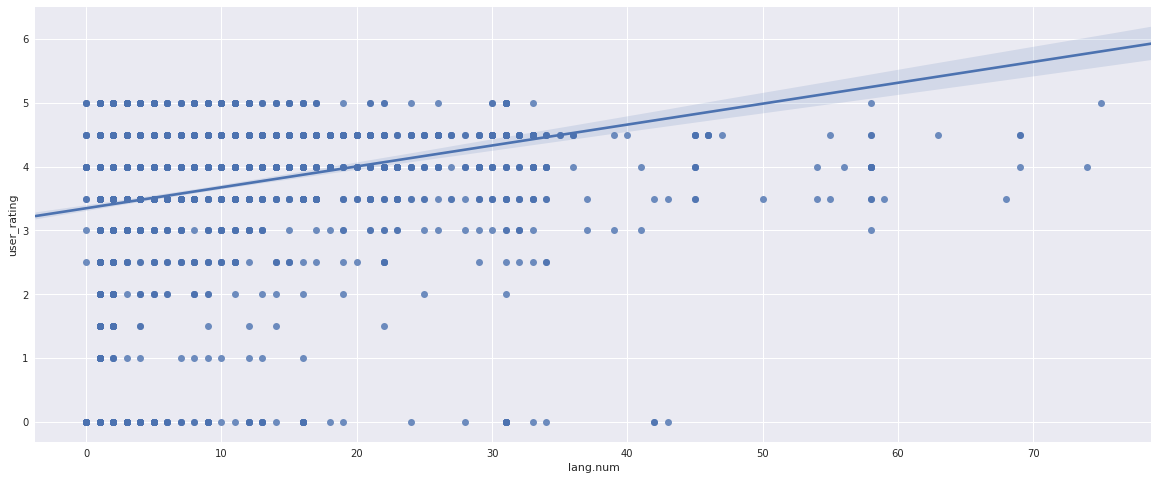

In [132]:
##plot scatter plot for rating versus supported languages

sns.regplot(app_store["lang.num"], app_store["user_rating"])

Question 5: Can the rating of the application be predicted from the initia properties of the application(size, supported devices, languages, price….)

In [91]:
##select input rows(rows which are not depending on the user but on the application)
input_rows = ["size_bytes","price", "prime_genre","sup_devices.num","ipadSc_urls.num","lang.num","ipadSc_urls.num"]
new_df = app_store[input_rows]
labels = np.array(app_store[["user_rating"]])

In [92]:
summarize(new_df)`

,size_bytes,price,sup_devices.num,ipadSc_urls.num,lang.num,ipadSc_urls.num
count,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,37.361817,3.707100,5.434903,3.707100
std,3.592069e+08,5.833006,3.737715,1.986005,7.919593,1.986005
min,5.898240e+05,0.000000,9.000000,0.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,37.000000,3.000000,1.000000,3.000000
50%,9.715302e+07,0.000000,37.000000,5.000000,1.000000,5.000000
75%,1.819249e+08,1.990000,38.000000,5.000000,8.000000,5.000000
max,4.025970e+09,299.990000,47.000000,5.000000,75.000000,5.000000


,size_bytes,price,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,ipadSc_urls.num
0,100788224,3.99,Games,38,5,10,5
1,158578688,0.00,Productivity,37,5,23,5
2,100524032,0.00,Weather,37,5,3,5
3,128512000,0.00,Shopping,37,5,9,5
4,92774400,0.00,Reference,37,5,45,5
5,10485713,0.99,Games,47,5,1,5
6,227795968,0.00,Finance,37,0,19,0
7,130242560,0.00,Music,37,4,1,4
8,49250304,9.99,Utilities,37,5,1,5
9,70023168,3.99,Games,38,0,10,0


In [96]:
#rencode 'prime_genre` to categorical
categorical_genre = pd.Categorical(new_df.prime_genre)
new_df.prime_genre = categorical_genre.codes

/home/stk/.conda/envs/mlnd2/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [97]:
new_df.head(6)

,size_bytes,price,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,ipadSc_urls.num
0,100788224,3.99,7,38,5,10,5
1,158578688,0.00,15,37,5,23,5
2,100524032,0.00,22,37,5,3,5
3,128512000,0.00,17,37,5,9,5
4,92774400,0.00,16,37,5,45,5
5,10485713,0.99,7,47,5,1,5


In [108]:
#convert labels to categorical values as sklearn works only with ints
categorical_labels = pd.Categorical(app_store.user_rating)
labels = categorical_labels.codes

In [111]:
#scale the data using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(new_df)
new_df = scaler.transform(new_df)

In [114]:
from sklearn.cross_validation import train_test_split
train_data,test_data, train_label , test_labels = train_test_split(new_df, labels, test_size=0.2, random_state=42)


In [129]:
from sklearn import svm
clf = svm.LinearSVC(C=0.01)
clf.fit(train_data, train_label)  

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [130]:
result = clf.score(train_data, train_label)
print("Train accuracy {}".format(result))

Train accuracy 0.3864860170227549


In [131]:
result2 = clf.score(test_data, test_labels)
print("Test accuracy {}".format(result2))

Test accuracy 0.38472222222222224
